In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *

# from test_utils import test

%load_ext autoreload
%autoreload 2

## Run de A a Z

### Loading  data 

In [3]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("dataset")

In [6]:
labels = np.genfromtxt("dataset/x_test.csv", delimiter=",", dtype = str, max_rows=1)
labels = np.delete(labels,0) # delete the label 'id' as we dont have it in x_train and x_test

### Cleaning and feature selection

Due to the high number of features with all different exceptions values and linearity, we decided to select manually the features we found relevant. The list below is the name of the feature, the exception values that we have to remplace, and wheter we remplace by majority (True) or by the mean (False)

In [52]:
label_list = [("MSCODE", [], True, None),
            ("_HCVU651", [9], True, None),
            ("_RFHYPE5", [9], True, None),
            ("_RFCHOL", [9], True, None),
            ("_RACE",[9], True, None),
            ("_BMI5",[], False, None),
            ("_EDUCAG",[9], True, None),
            ("_INCOMG",[9], True, None),
            ("_DRNKWEK",[99900], False, None),
            ("_SMOKER3",[9], True, None),
            ("_FRUTSUM",[], False, None),
            ("_VEGESUM",[], False, None),
            ("PA1MIN_",[], False, None),
            ("GENHLTH",[7,9], False, None),
            ("CHECKUP1",[7,9], False, None),
            ("MENTHLTH",[77, 99], False, 88), 
            ("BPHIGH4",[7,9], True, None),
            ("BPMEDS",[7,9], True, None),
            ("TOLDHI2",[7,9], True, None),
            ("CHCOCNCR",[7,8,9], True, None),
            ("DIABETE3",[7,8,9], True, None),
            ("SEX",[], True, None),
            ("QLACTLM2",[7,9], True, None),
            ("AVEDRNK2",[77, 99], False, None),
            ("EXERANY2",[7,9], True, None),
            ("SHINGLE2", [7,9], True, None),
            ("LMTJOIN3", [7,9], True, None),
            ("CVDASPRN", [7,9], True, None),
            ("PHYSHLTH",[77,99], False, 88), #88 -> 0 
            ("POORHLTH",[77,99], False, 88), # 88 -> 0  
            ("HLTHPLN1",[7,9], True, None),
            ("BLOODCHO", [7,9], True, None),
            ("CHOLCHK",[7,9],True, None),
            ("CVDSTRK3", [7,9], True, None),
            ("ASTHMA3", [7,9], True, None),
            ("ASTHNOW", [7,9], True, None),
            ("CHCSCNCR", [7,9], True, None),
            ("CHCCOPD1",[7,9], True, None),
            ("HAVARTH3", [7,9], True, None),
            ("ADDEPEV2", [7,9], True, None),
            ("CHCKIDNY", [7,9], True, None),
            ("DIABAGE2", [98,99], False, None),
            ("MARITAL", [9], True, None),
            ("RENTHOM1", [7,9], True, None),
            ("EMPLOY1", [9], True, None),
            ("CHILDREN", [99], False, 88), # 88 -> 0 
            ("INCOME2", [77,99], True, None),
            ("INTERNET", [7,9], True, None),
            ("QLACTLM2", [7,9], True, None),
            ("USEEQUIP", [7,9], True, None),
            ("BLIND", [7,9], True, None),
            ("DECIDE", [7,9], True, None),
            ("DIFFWALK", [7,9], True, None),
            ("DIFFDRES", [7,9], True, None),
            ("DIFFALON", [7,9], True, None),
            ("SMOKE100", [7,9], True, None),
            ("SMOKDAY2", [7,9], True, None),
            ("STOPSMK2", [7,9], True, None),
            ("USENOW3", [7,9], True, None), 
            ("DRNK3GE5", [77,99],False, 88),
            ("MAXDRNKS", [77,99], False, None),
            ("LMTJOIN3", [7,9], True, None),
            ("ARTHDIS2", [7,9], True, None),
            ("ARTHSOCL", [7,9], True,None),
            ("FLUSHOT6", [7,9],True, None),
            ("PNEUVAC3", [7,9], True, None),
            ("PDIABTST", [7,9], True,None),
            ("_RFHLTH", [9], True, None),
            ("_CHOLCHK", [9], True, None),
            ("_LTASTH1", [9], True,None),
            ("_CASTHM1", [9], True, None),
            ("_DRDXAR1", [], True, None),
            ("WTKG3", [99999], False , None),
            ("_RFBMI5", [9], True, None),
            ("_RFSMOK3", [9], True , None),
            ("DRNKANY5", [7,9], True, None),
            ("DROCDY3_", [900], False,None),
            ("_RFBING5", [9], True, None),
            ("FTJUDA1_", [], False, None),
            ("FRUTDA1_", [], False, None),
            ("BEANDAY_", [], False, None),
            ("GRENDAY_",[], False,None),
            ("ORNGDAY_", [],False, None),
            ("VEGEDA1_", [], False, None),
            ]

cleaned_x_train = clean_data(labels, label_list, x_train)

In [72]:
cleaned_x_train.shape

(328135, 84)

We then check that we have enough data in our features, i.e. there is not an exagerated amount of nans

In [6]:
# want to see which labels are way to small

for label in label_list:
    l, _, _ = label
    id = np.where(labels == l)[0][0]
    x = x_train[:][id]

    # Count the number of NaN values
    nans= np.count_nonzero(np.isnan(x))
    nan_perc = nans/len(x) *100
    #print(nan_perc)

We check that our features are uncorrelated as it would lead to less good results, but we saw that the uncorrelated data had the same dimension as the original cleaned data, so no changes were made.

In [7]:
correlation_matrix = np.corrcoef(cleaned_x_train, rowvar=False)
correlation_threshold = 0.7
uncorrelated_indices = np.where(np.abs(correlation_matrix) < correlation_threshold)
uncorrelated_columns = np.unique(uncorrelated_indices[1])
uncorrelated_data = cleaned_x_train[:, uncorrelated_columns]
print(uncorrelated_data.shape)
cleaned_x_train.shape

(328135, 28)


(328135, 28)

## Training
We here choose which function we want to train our data with

#### Ridge regression

In [8]:
lambda_ = 0.0001
degree = 25
## tx is cleaned data 
poly = build_poly(cleaned_x_train,degree)
w , loss = ridge_regression(y_train,poly,lambda_)
w.shape

(701,)

#### Mean squared errors gd

In [9]:
gamma = 0.0001
max_iters = 1000
w_initial = np.zeros(cleaned_x_train.shape[1])

w, loss = mean_squared_error_gd(y_train, cleaned_x_train, w_initial, max_iters, gamma)

In [10]:
loss

0.15174410864282326

#### Mean squared error sgd

In [19]:
x_train_1, y_train_1, x_test_1, y_test_1 = split_train_test(y_train, x_train, 0.7)
cleaned_x_train_1 = clean_data(labels, label_list, x_train_1)
cleaned_x_test_1 = clean_data(labels, label_list, x_test_1)

In [138]:
x_train_1, y_train_1, x_test_1, y_test_1 = split_train_test(y_train, x_train, 0.7)
cleaned_x_train_1 = clean_data(labels, label_list, x_train_1)
cleaned_x_test_1 = clean_data(labels, label_list, x_test_1)

gamma = 0.03684211157894737
max_iters = 300
#w_initial = np.zeros(cleaned_x_train.shape[1])
initial_w = np.zeros(cleaned_x_train_1.shape[1])
# remettre a 0 entre chaque run ? 
w = []
loss = 0
yp = []
acc = 0
f1 = 0

#w, loss = mean_squared_error_sgd(y_train, cleaned_x_train, w_initial, max_iters, gamma)
w, loss = mean_squared_error_gd(y_train_1, cleaned_x_train_1, initial_w, max_iters, gamma)
yp = predict_labels_mse(w,cleaned_x_test_1)
#yp = predict_labels_logistic(w, cleaned_x_test_1)

# mesure accuracy
acc = measure_accuracy(y_test_1, yp)
f1 = measure_f1_score(y_test_1, yp)

y pred : '[4.37600356e+25 5.52661106e+25 4.51852034e+25 ... 3.91049147e+25
 5.08228170e+25 5.06617256e+25]'.


In [139]:
f1

0.16356988284456384

0.00360482144868762

#### Least squared error

In [12]:
w, loss = least_squares(y_train, cleaned_x_train)

#### logistic regression

In [13]:
max_iters = 1000
gamma = 0.01
w_initial = np.zeros(cleaned_x_train.shape[1])
w, loss = logistic_regression(y_train, cleaned_x_train, w_initial, max_iters, gamma)

c:\Users\duval\Documents\GitHub\ML_project1\helpers.py:96: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
c:\Users\duval\Documents\GitHub\ML_project1\helpers.py:115: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
c:\Users\duval\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


#### reg logistic

In [14]:
max_iters = 1000
gamma = 0.01
lambda_ = 0.001
w_initial = np.zeros(cleaned_x_train.shape[1])
w, loss = reg_logistic_regression(y_train, cleaned_x_train, lambda_, w_initial, max_iters, gamma)

In [15]:
#print(w)
#print(loss)
#print(len(w))

### Testing

We then test our data, cleaning the test dataset and building predictions

In [54]:
#clean up x test

cleaned_x_test = clean_data(labels, label_list, x_test)


In [17]:
# only used for ridge
poly_test = build_poly(cleaned_x_test,degree)
poly_test.shape                                 

(109379, 701)

#### Prediction

Use the correct prediction function depending on which train method

In [18]:
yp = predict_labels_mse(w,cleaned_x_test)

In [19]:
yp = predict_labels_logistic(w,cleaned_x_test)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.19096188e-304
 0.00000000e+000 0.00000000e+000]


In [20]:
#print(len(np.where(y_pred == 1)[0]))

#### CSV Submission

In [21]:
create_csv_submission(test_ids,yp,"outputs/ridge_degre25_200features.csv")

## Train test split for our own cross validation

####read me or smth

- N c'est le nombre de loops
- pour l'instant ca loop sur gamma mais si tu veux changer de param tu peux le modifier
- initial_w, accs et f1s pas besoin de changer

Utilise pas ridge i guess tfacon c'est pas celle qui nous interesse


In [77]:
x_train_1, y_train_1, x_test_1, y_test_1 = split_train_test(y_train, x_train, 0.6)
cleaned_x_train_1 = clean_data(labels, label_list, x_train_1)
cleaned_x_test_1 = clean_data(labels, label_list, x_test_1)

In [80]:
N = 10
max_iters = 300

gammas = np.linspace(0.00000001, 0.1, N)
#gammas = [0.018,0.185,0.019,0.0195,0.020]
#degree = range(25)
degree = 14
#gammas = np.linspace(0.01,0.001,N)
#gammas = np.linspace(0.00001, 0.1, N)

#lambda_ = 0.01
lambda_ = np.linspace(0.0001, 0.1, N)

initial_w = np.zeros(cleaned_x_train_1.shape[1])
accs6 = []
f1s6 = []

for lam in lambda_:
    #print("Gamma : '{}'.".format(gamma))
    # train
    # choisi la methode de train qui t'interesse
    poly_train = build_poly(cleaned_x_train_1, degree)
    w, loss = ridge_regression(y_train_1, poly_train, lam)
    #w, loss = mean_squared_error_gd(y_train_1, cleaned_x_train_1, initial_w, max_iters, gamma)
    ## remplacer gamma par lambda 
    #w, loss = reg_logistic_regression(y_train_1, cleaned_x_train_1, lambda_, initial_w, max_iters, gamma)
    #predict 
    # choisi la methode de test qui t'interresse (commente l'autre)
    poly_test = build_poly(cleaned_x_test_1, degree)
    yp = predict_labels_mse(w,poly_test)
    #yp = predict_labels_logistic(w, cleaned_x_test_1)

    # mesure accuracy
    acc = measure_accuracy(y_test_1, yp)
    f1 = measure_f1_score(y_test_1, yp)
    accs6.append(acc)
    f1s6.append(f1)

y pred : '[-3.86836112 -0.9438371  -0.79778624 ...  0.03453413 -1.09315406
 -0.52677595]'.
y pred : '[ 3.12567177  0.67683337 -1.92261164 ...  1.14480517 -1.81145354
  0.94434354]'.
y pred : '[-0.26232482 -0.73475675 -0.90690548 ...  0.11605854 -0.94849401
 -0.86210978]'.
y pred : '[-0.25933356 -0.83140562 -0.81753155 ... -0.07188808 -0.89737581
 -0.819845  ]'.
y pred : '[-0.11827825 -0.86365607 -0.75827577 ... -0.17233343 -0.87557772
 -0.61436494]'.
y pred : '[ 0.13882423 -0.87209227 -0.68717902 ... -0.19358449 -0.82858333
 -0.15938601]'.
y pred : '[ 0.85394071 -0.76154504 -0.54089667 ... -0.06854787 -0.59301626
  1.53466113]'.
y pred : '[-17.95157929  -4.57424725  -3.78249634 ...  -5.64871935  -6.57051798
 -44.04061927]'.
y pred : '[-2.47504841 -1.67346299 -1.00597671 ... -1.1244175  -1.59373554
 -6.70358822]'.
y pred : '[-1.65241389 -1.59475957 -0.83354371 ... -0.95443338 -1.35162783
 -4.86656789]'.


In [79]:
# pour 0.5
print(accs)
print(f1s)

[0.7411179579074403, 0.8560527101732829, 0.6801306783204423, 0.8439722796174733, 0.7809187709899005, 0.7496815325446311, 0.856826784179634, 0.872460641079559, 0.8727044439162049, 0.5850841424539974, 0.8425419415789233, 0.6296036692215095, 0.8349612202294787, 0.8712344004754141, 0.879782711384034, 0.8572005424596584, 0.7642205189937069, 0.5425129900803023, 0.6192725555030704, 0.6494202081460374]
[0.19462247335886837, 0.25065837484532155, 0.12431169697980977, 0.22335487394193138, 0.2084562871614182, 0.1424842878917587, 0.14469851441887563, 0.13120199294166493, 0.1327187409160749, 0.18680714831804282, 0.1899423823148983, 0.14154541601921175, 0.10753131179960448, 0.11080128373757037, 0.14592692828146142, 0.18184992797590466, 0.17194231129424986, 0.16458672454331705, 0.16771593218080677, 0.16962916177930162]


In [81]:
print(accs6)
print(f1s6)

[0.8425419415789233, 0.6296036692215095, 0.8349612202294787, 0.8712344004754141, 0.879782711384034, 0.8572005424596584, 0.7642205189937069, 0.5425129900803023, 0.6192725555030704, 0.6494202081460374]
[0.1899423823148983, 0.14154541601921175, 0.10753131179960448, 0.11080128373757037, 0.14592692828146142, 0.18184992797590466, 0.17194231129424986, 0.16458672454331705, 0.16771593218080677, 0.16962916177930162]


In [ ]:
print(accs7)
print(f1s7)

In [48]:
lambda_ = np.linspace(0.001, 0.1, N)
lambda_[9]

0.08900000000000001

In [84]:
threshold = 0.19
# Get the indices where values are greater than the threshold
indices_above_threshold = [i for i, value in enumerate(f1s) if value > threshold]

# Sort the indices
indices_above_threshold.sort()

print("Indices of elements above the threshold: ", indices_above_threshold)

Indices of elements above the threshold:  [10, 11]


0.63 / 0.219 : entre 0.0156 et 0.0159 
0.837 : 0.153 : 0.0156
0.88 / 0.148 : 0.0157

1ere fois
je tente 300 et gamma = 0.0156 : [0.8348740349451442, 0.780607476635514]
je tente 300 et gamma = 0.0157 :  [0.08033946251768034, 0.16027061705354018]
2eme fois idem 
[0.9062474603819586, 0.8959162941893539]
[0.027809965237543453, 0.1580936729663106]
3eme fois
[0.8829744006501422, 0.12064201544087769]
[0.10683826949914715, 0.1655355903447212]


gammas = np.linspace(0.01455,0.01655,N)
 9 au cas ou 0.015392105263157894
 10 0.74 / 0.195 : 0.015497368421052631
 11 0.87 / 0.20  : 0.015602631578947368 
 12 au cas ou : 0.015707894736842105
il devrait exister un 

0.86 / 0.22 mais jsp quelle valeurs 

Visiblement rester a des chiffres exacts 

In [ ]:
[0.9109101991060544, 0.8207029662738724, 0.9089800893945551, 0.9085331166192605, 0.9055160503860219, 0.6329642421779764, 0.9071820398212109, 0.9067249085737505, 0.13592035757822024, 0.13160300690776108, 0.9076696464851687, 0.9055160503860219, 0.7161722876879317, 0.7563490451036164, 0.9104937017472572, 0.9076594880130029, 0.09873019097927671, 0.22479683055668429, 0.6392929703372613, 0.9107273466070703, 0.8376980902072328, 0.09902478667208452, 0.31964648516863065, 0.0904611946363267]
[0.00022799817601459188, 0.09291807996710864, 0.03135135135135135, 0.006838738142510479, 0.02413178050571818, 0.21964968359214704, 0.025594539831502613, 0.047312720481427685, 0.15646879152700371, 0.16390364132507848, 0.052735799895779055, 0.054103528933184174, 0.1750324790362584, 0.19310344827586207, 0.0036186814429492254, 0.018570503131073203, 0.163112071161084, 0.1593575465150864, 0.12429712932820361, 0.00022753128555176336, 0.0610049955921246, 0.16367751060820368, 0.1621756861567715, 0.1635135513887721]

In [60]:
# Previous Test cant remember param gamma rip for the 0.86 : 0.22
print(accs)
print(f1s)

[0.910930516050386, 0.910930516050386, 0.9099756196668021, 0.8630434782608696, 0.6709670865501829, 0.2854937017472572, 0.5486286062576189, 0.9109203575782202, 0.9109203575782202, 0.910930516050386, 0.9095184884193417, 0.9108187728565623, 0.910930516050386, 0.910930516050386, 0.09434173100365705, 0.910930516050386, 0.08906948394961398, 0.08906948394961398, 0.08907964242177976, 0.08906948394961398]
[0.0, 0.0, 0.022501654533421574, 0.21970135432341706, 0.1793767418292374, 0.14222298104831826, 0.13871174087499272, 0.0, 0.0, 0.0, 0.0017931189061974671, 0.0, 0.0, 0.0, 0.1627018041454962, 0.0, 0.16356988284456384, 0.16356988284456384, 0.16357140858339475, 0.16356988284456384]


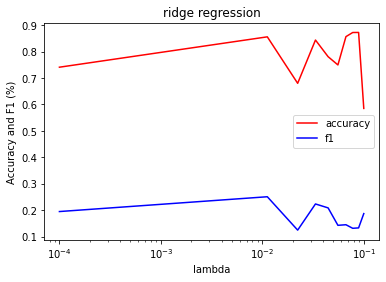

In [62]:
# tu peux plot tes tableaux ici ca fait ton parametre x accuracies et f1 
# (change le gammas si t'as changé de param la haut)
plt.plot(lambda_,accs,"r")
plt.plot(lambda_, f1s, "b")
plt.plot(lambda_,accs6,"g")
plt.plot(lambda_, f1s6, "y")
plt.plot(lambda_,accs7,"o")
plt.plot(lambda_, f1s7, "p")

plt.title("ridge regression")
plt.legend(["accuracy 0.5", "f1 0.5", "accuracy 0.6", "f1 0.6", "accuracy 0.6", "f1 0.6"])
plt.xlabel("lambda")
plt.ylabel("Accuracy and F1 (%)")
plt.xscale('log')
plt.show()

In [63]:
print(lambda_)

[0.0001 0.0112 0.0223 0.0334 0.0445 0.0556 0.0667 0.0778 0.0889 0.1   ]


In [70]:
print(accs[7])
f1s[1]

0.872460641079559


0.25065837484532155

# testing which method is better

In [28]:
gamma = 0.01
lambda_ = 0.0000001
max_iters = 1000
degree = 9
initial_w = np.zeros(cleaned_x_train_1.shape[1])

# ridge
poly_train = build_poly(cleaned_x_train_1, degree)
w, loss = ridge_regression(y_train_1, poly_train, lambda_)
poly_test = build_poly(cleaned_x_test_1, degree)
yp = predict_labels_mse(w, poly_test)

print("accuracy ridge:")
accuracy = measure_accuracy(y_test_1, yp)
print(accuracy)
print("f1 ridge:")
f1 = measure_f1_score(y_test_1, yp)
print(f1)

# mse gd
w, loss = mean_squared_error_gd(y_train_1, cleaned_x_train_1, initial_w, max_iters, gamma)
yp = predict_labels_mse(w, cleaned_x_test_1)

print("accuracy mse gd:")
accuracy = measure_accuracy(y_test_1, yp)
print(accuracy)
print("f1 mse gd:")
f1 = measure_f1_score(y_test_1, yp)
print(f1)

# mse sgd
w, loss = mean_squared_error_sgd(y_train_1, cleaned_x_train_1, initial_w, max_iters, gamma)
yp = predict_labels_mse(w, cleaned_x_test_1)

print("accuracy mse sgd:")
accuracy = measure_accuracy(y_test_1, yp)
print(accuracy)
print("f1 mse sgd:")
f1 = measure_f1_score(y_test_1, yp)
print(f1)

# mse sgd
w, loss = least_squares(y_train_1, cleaned_x_train_1)
yp = predict_labels_mse(w, cleaned_x_test_1)

print("accuracy least squares:")
accuracy = measure_accuracy(y_test_1, yp)
print(accuracy)
print("f1 mse least squares:")
f1 = measure_f1_score(y_test_1, yp)
print(f1)

# logistic reg
w, loss = logistic_regression(y_train_1, cleaned_x_train_1, initial_w, max_iters, gamma)
yp = predict_labels_logistic(w, cleaned_x_test_1)

print("accuracy logistic reg:")
accuracy = measure_accuracy(y_test_1, yp)
print(accuracy)
print("f1 mse logistic reg:")
f1 = measure_f1_score(y_test_1, yp)
print(f1)

#  reg logistic reg
w, loss = reg_logistic_regression(y_train_1, cleaned_x_train_1, lambda_, initial_w, max_iters, gamma)
yp = predict_labels_logistic(w, cleaned_x_test_1)

print("accuracy reg logistic reg:")
accuracy = measure_accuracy(y_test_1, yp)
print(accuracy)
print("f1 mse reg logistic reg:")
f1 = measure_f1_score(y_test_1, yp)
print(f1)


accuracy ridge:
0.9063693620479479
f1 ridge:
0.19382489285401908
accuracy mse gd:
0.910930516050386
f1 mse gd:
0.0
accuracy mse sgd:
0.8993295408370581
f1 mse sgd:
0.15385928961748635
accuracy least squares:
0.910930516050386
f1 mse least squares:
0.0
accuracy logistic reg:
0.910930516050386
f1 mse logistic reg:
0.0
accuracy reg logistic reg:
0.910930516050386
f1 mse reg logistic reg:
0.0


In [ ]:
lamdas = 0.0000001
accs = []
f1s = []
degrees = range(25)
for deg in degrees:

    # ridge
    poly_train = build_poly(cleaned_x_train_1, deg)
    w, loss = ridge_regression(y_train_1, poly_train, lamdas)
    poly_test = build_poly(cleaned_x_test_1, deg)
    yp = predict_labels_mse(w, poly_test)

    accuracy = measure_accuracy(y_test_1, yp)
    f1 = measure_f1_score(y_test_1, yp)
    accs.append(accuracy)
    f1s.append(f1)


